Wealth Data: {'original_message': 'Transfer 1000 units', 'net_worth': 19000, 'assets': 9500}


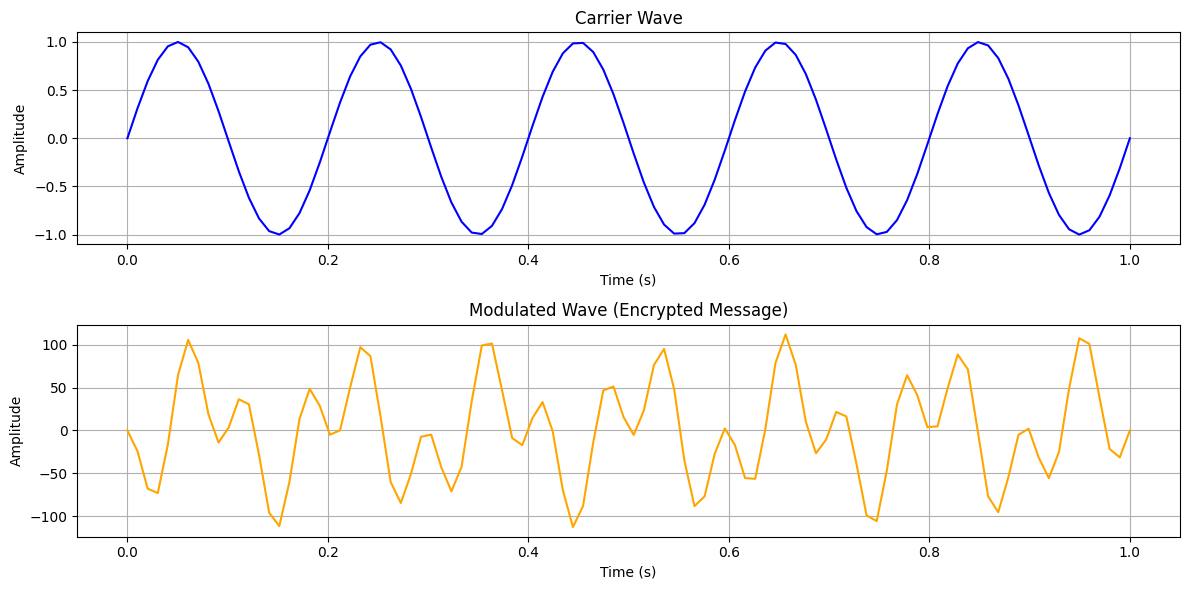

[VPN] Transmitting data securely...
[VPN] Encrypted and transmitted data: MMSSj9NpO+Y3K2onF2b2KJw2uUi1efSHy4peOnVHIxY=
[Cloud] Storing data in cloud for deep space transmission...
[Cloud] Data successfully stored: MMSSj9NpO+Y3K2onF2b2KJw2uUi1efSHy4peOnVHIxY=


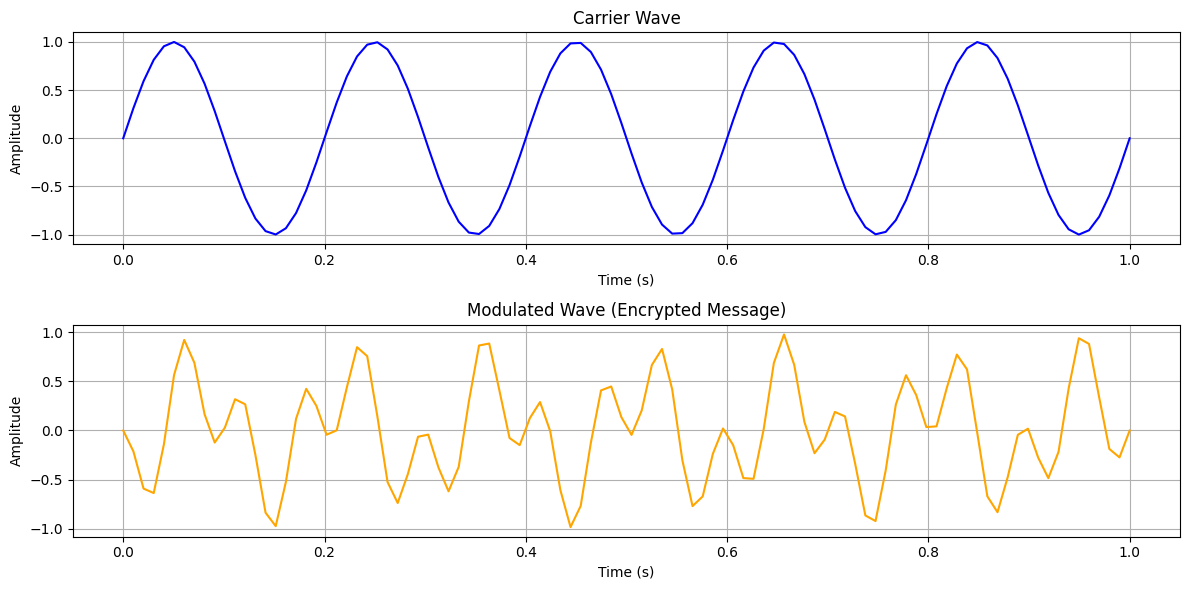

[VPN] Transmitting data securely...
[VPN] Encrypted and transmitted data: MMSSj9NpO+Y3K2onF2b2KJw2uUi1efSHy4peOnVHIxY=
[Cloud] Storing data in cloud for deep space transmission...
[Cloud] Data successfully stored: MMSSj9NpO+Y3K2onF2b2KJw2uUi1efSHy4peOnVHIxY=


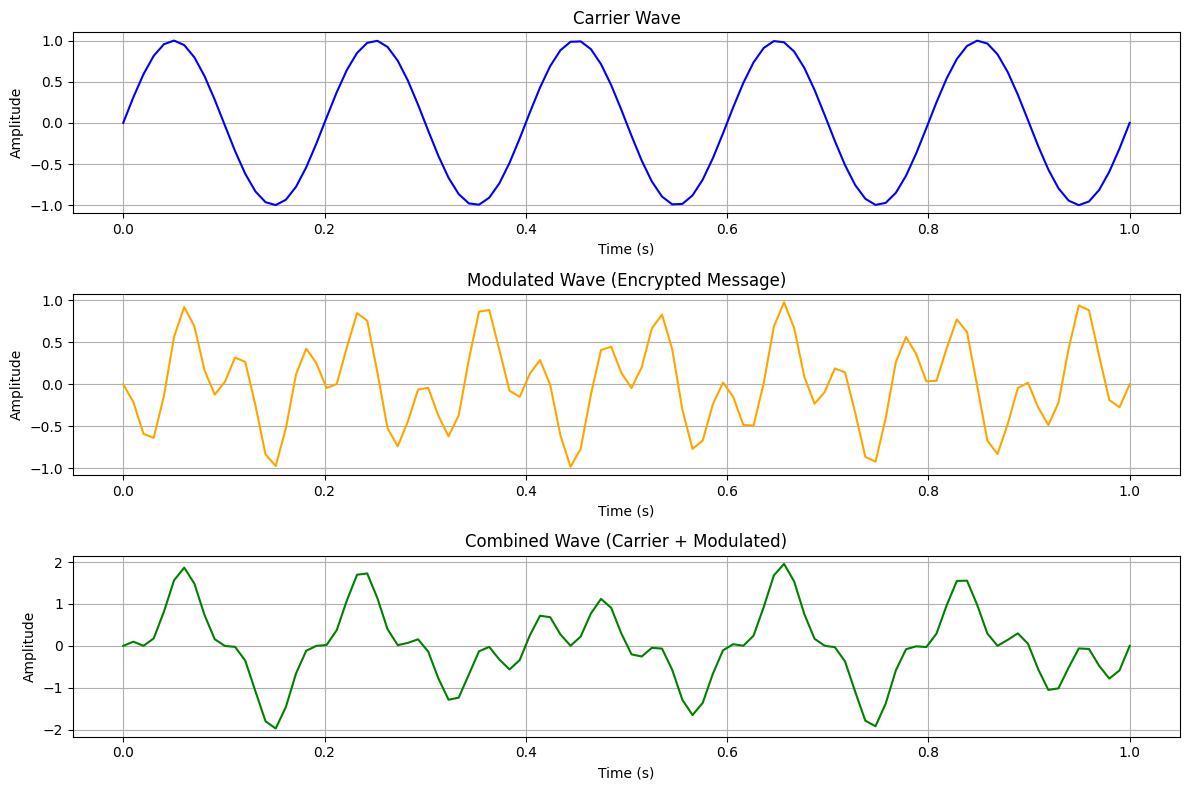

Encoded Message (Hamming): [0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
Decoded Message: Test


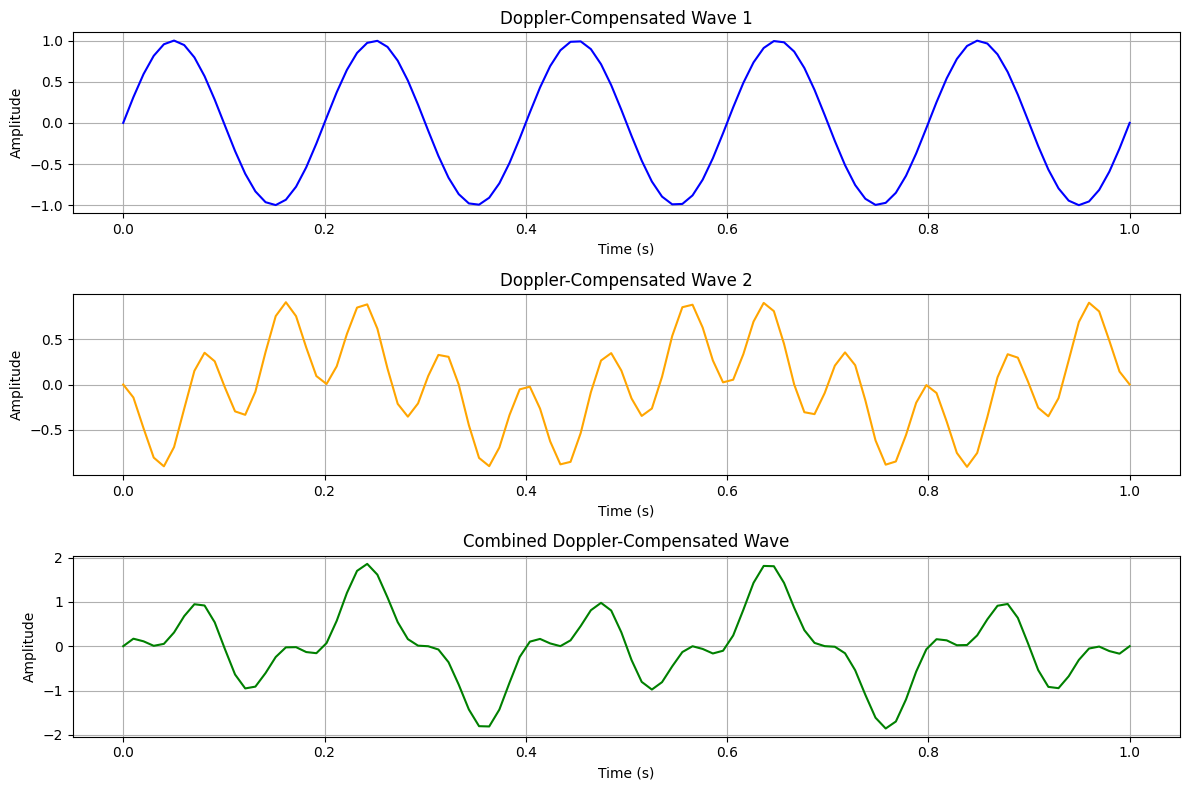

In [4]:
!pip install torch cryptography numpy


import torch
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# Step 1: Generate the dense wave (sinusoidal waveform modulated by message data)
def generate_dense_wave(message: str, frequency: float, sample_rate: int, duration: float):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    # Convert message to numerical values (simple encoding)
    message_bytes = [ord(c) for c in message]
    message_tensor = torch.tensor(message_bytes, dtype=torch.float32)
    # Create a carrier wave (sine wave)
    carrier_wave = torch.sin(2 * np.pi * frequency * t)
    # Modulate the carrier wave with the message tensor
    modulated_wave = carrier_wave * torch.sin(2 * np.pi * message_tensor.mean() * t)
    return modulated_wave

# Step 2: Encrypt the message
def encrypt_message(message: str, key: bytes):
    backend = default_backend()
    iv = b'\x00' * 16  # Initialization vector (in a real system, use a secure IV)
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()

    # Pad the message to be AES block-size compliant
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(message.encode()) + padder.finalize()

    encrypted_message = encryptor.update(padded_data) + encryptor.finalize()
    return encrypted_message

# Step 3: Modulate encrypted message into the waveform
def modulate_wave_with_encryption(wave: torch.Tensor, encrypted_message: bytes):
    # Convert encrypted message to tensor
    encrypted_tensor = torch.tensor([byte for byte in encrypted_message], dtype=torch.float32)
    # Normalize encrypted tensor and modulate it with the wave
    modulated_wave = wave * encrypted_tensor.mean()
    return modulated_wave

# Step 4: Demodulate and decrypt
def decrypt_message(encrypted_message: bytes, key: bytes):
    backend = default_backend()
    iv = b'\x00' * 16  # Same IV as in encryption
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    decryptor = cipher.decryptor()

    decrypted_padded = decryptor.update(encrypted_message) + decryptor.finalize()

    # Unpad the message
    unpadder = padding.PKCS7(algorithms.AES.block_size).unpadder()
    decrypted_message = unpadder.update(decrypted_padded) + unpadder.finalize()

    return decrypted_message.decode()

# Step 5: Transform into wealth data (dummy transformation for demo)
def transform_to_wealth_data(decrypted_message: str):
    # In a real-world application, this would involve parsing wealth-specific fields
    wealth_data = {
        "original_message": decrypted_message,
        "net_worth": len(decrypted_message) * 1000,  # Dummy wealth computation
        "assets": len(decrypted_message) * 500,
    }
    return wealth_data

# Example usage
if __name__ == "__main__":
    # Initial settings
    message = "Transfer 1000 units"
    key = b'\x01' * 32  # AES-256 key
    frequency = 5.0  # Frequency in Hz
    sample_rate = 100  # Samples per second
    duration = 1.0  # Wave duration in seconds

    # Step 1: Create dense wave
    wave = generate_dense_wave(message, frequency, sample_rate, duration)

    # Step 2: Encrypt the message
    encrypted_message = encrypt_message(message, key)

    # Step 3: Modulate the wave with encrypted message
    modulated_wave = modulate_wave_with_encryption(wave, encrypted_message)

    # Step 4: Decrypt the message (for demonstration)
    decrypted_message = decrypt_message(encrypted_message, key)

    # Step 5: Transform to wealth data
    wealth_data = transform_to_wealth_data(decrypted_message)

    print("Wealth Data:", wealth_data)

!pip install matplotlib

import torch
import numpy as np
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# Step 1: Generate the dense wave (sinusoidal waveform modulated by message data)
def generate_dense_wave(message: str, frequency: float, sample_rate: int, duration: float):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    # Convert message to numerical values (simple encoding)
    message_bytes = [ord(c) for c in message]
    message_tensor = torch.tensor(message_bytes, dtype=torch.float32)
    # Create a carrier wave (sine wave)
    carrier_wave = torch.sin(2 * np.pi * frequency * t)
    # Modulate the carrier wave with the message tensor
    modulated_wave = carrier_wave * torch.sin(2 * np.pi * message_tensor.mean() * t)
    return t, carrier_wave, modulated_wave

# Step 2: Encrypt the message
def encrypt_message(message: str, key: bytes):
    backend = default_backend()
    iv = b'\x00' * 16  # Initialization vector (in a real system, use a secure IV)
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()

    # Pad the message to be AES block-size compliant
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(message.encode()) + padder.finalize()

    encrypted_message = encryptor.update(padded_data) + encryptor.finalize()
    return encrypted_message

# Step 3: Modulate encrypted message into the waveform
def modulate_wave_with_encryption(wave: torch.Tensor, encrypted_message: bytes):
    # Convert encrypted message to tensor
    encrypted_tensor = torch.tensor([byte for byte in encrypted_message], dtype=torch.float32)
    # Normalize encrypted tensor and modulate it with the wave
    modulated_wave = wave * encrypted_tensor.mean()
    return modulated_wave

# Step 4: Visualization using Matplotlib
def visualize_modulation(t, carrier_wave, modulated_wave):
    plt.figure(figsize=(12, 6))

    # Plot the original carrier wave
    plt.subplot(2, 1, 1)
    plt.plot(t.numpy(), carrier_wave.numpy(), label="Carrier Wave", color="blue")
    plt.title("Carrier Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot the modulated wave
    plt.subplot(2, 1, 2)
    plt.plot(t.numpy(), modulated_wave.numpy(), label="Modulated Wave", color="orange")
    plt.title("Modulated Wave (Encrypted Message)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Initial settings
    message = "Transfer 1000 units"
    key = b'\x01' * 32  # AES-256 key
    frequency = 5.0  # Frequency in Hz
    sample_rate = 100  # Samples per second
    duration = 1.0  # Wave duration in seconds

    # Step 1: Create dense wave
    t, carrier_wave, modulated_wave = generate_dense_wave(message, frequency, sample_rate, duration)

    # Step 2: Encrypt the message
    encrypted_message = encrypt_message(message, key)

    # Step 3: Modulate the wave with encrypted message
    modulated_wave_with_encryption = modulate_wave_with_encryption(modulated_wave, encrypted_message)

    # Step 4: Visualize the modulation
    visualize_modulation(t, carrier_wave, modulated_wave_with_encryption)

import torch
import numpy as np
import time
import base64
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# Step 1: Generate the dense wave (sinusoidal waveform modulated by message data)
def generate_dense_wave(message: str, frequency: float, sample_rate: int, duration: float):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    # Convert message to numerical values (simple encoding)
    message_bytes = [ord(c) for c in message]
    message_tensor = torch.tensor(message_bytes, dtype=torch.float32)
    # Create a carrier wave (sine wave)
    carrier_wave = torch.sin(2 * np.pi * frequency * t)
    # Modulate the carrier wave with the message tensor
    modulated_wave = carrier_wave * torch.sin(2 * np.pi * message_tensor.mean() * t)
    return t, carrier_wave, modulated_wave

# Step 2: Encrypt the message (VPN layer encryption)
def encrypt_message(message: str, key: bytes):
    backend = default_backend()
    iv = b'\x00' * 16  # Initialization vector (in a real system, use a secure IV)
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()

    # Pad the message to be AES block-size compliant
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(message.encode()) + padder.finalize()

    encrypted_message = encryptor.update(padded_data) + encryptor.finalize()
    return encrypted_message

# Step 3: Simulate VPN layer transmission with encryption
def vpn_layer_transmission(data: bytes):
    # Simulate the "VPN" by encrypting the message
    print("[VPN] Transmitting data securely...")
    time.sleep(1)  # Simulating network delay
    encoded_data = base64.b64encode(data)
    print(f"[VPN] Encrypted and transmitted data: {encoded_data.decode('utf-8')}")
    return encoded_data

# Step 4: Simulate cloud storage transfer and deep space transmission
def cloud_transfer(encoded_data: bytes):
    print("[Cloud] Storing data in cloud for deep space transmission...")
    time.sleep(2)  # Simulating storage delay
    print(f"[Cloud] Data successfully stored: {encoded_data.decode('utf-8')}")

# Step 5: Visualization using Matplotlib
def visualize_modulation(t, carrier_wave, modulated_wave):
    plt.figure(figsize=(12, 6))

    # Plot the original carrier wave
    plt.subplot(2, 1, 1)
    plt.plot(t.numpy(), carrier_wave.numpy(), label="Carrier Wave", color="blue")
    plt.title("Carrier Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot the modulated wave
    plt.subplot(2, 1, 2)
    plt.plot(t.numpy(), modulated_wave.numpy(), label="Modulated Wave", color="orange")
    plt.title("Modulated Wave (Encrypted Message)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Initial settings
    message = "Transfer 1000 units"
    key = b'\x01' * 32  # AES-256 key
    frequency = 5.0  # Frequency in Hz
    sample_rate = 100  # Samples per second
    duration = 1.0  # Wave duration in seconds

    # Step 1: Create dense wave
    t, carrier_wave, modulated_wave = generate_dense_wave(message, frequency, sample_rate, duration)

    # Step 2: Encrypt the message
    encrypted_message = encrypt_message(message, key)

    # Step 3: VPN Layer Transmission (simulate VPN secure transmission)
    vpn_encrypted_message = vpn_layer_transmission(encrypted_message)

    # Step 4: Cloud transfer and simulated "deep space" transmission
    cloud_transfer(vpn_encrypted_message)

    # Step 5: Visualize the wave modulation
    visualize_modulation(t, carrier_wave, modulated_wave)

import torch
import numpy as np
import time
import base64
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# Step 1: Generate the dense wave (sinusoidal waveform modulated by message data)
def generate_dense_wave(message: str, frequency: float, sample_rate: int, duration: float):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    # Convert message to numerical values (simple encoding)
    message_bytes = [ord(c) for c in message]
    message_tensor = torch.tensor(message_bytes, dtype=torch.float32)
    # Create a carrier wave (sine wave)
    carrier_wave = torch.sin(2 * np.pi * frequency * t)
    # Modulate the carrier wave with the message tensor
    modulated_wave = carrier_wave * torch.sin(2 * np.pi * message_tensor.mean() * t)
    return t, carrier_wave, modulated_wave

# Step 2: Combine the waves (carrier wave + modulated wave)
def combine_waves(carrier_wave: torch.Tensor, modulated_wave: torch.Tensor):
    combined_wave = carrier_wave + modulated_wave  # Simple addition
    return combined_wave

# Step 3: Encrypt the message (VPN layer encryption)
def encrypt_message(message: str, key: bytes):
    backend = default_backend()
    iv = b'\x00' * 16  # Initialization vector (in a real system, use a secure IV)
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()

    # Pad the message to be AES block-size compliant
    padder = padding.PKCS7(algorithms.AES.block_size).padder()
    padded_data = padder.update(message.encode()) + padder.finalize()

    encrypted_message = encryptor.update(padded_data) + encryptor.finalize()
    return encrypted_message

# Step 4: Simulate VPN layer transmission with encryption
def vpn_layer_transmission(data: bytes):
    # Simulate the "VPN" by encrypting the message
    print("[VPN] Transmitting data securely...")
    time.sleep(1)  # Simulating network delay
    encoded_data = base64.b64encode(data)
    print(f"[VPN] Encrypted and transmitted data: {encoded_data.decode('utf-8')}")
    return encoded_data

# Step 5: Simulate cloud storage transfer and deep space transmission
def cloud_transfer(encoded_data: bytes):
    print("[Cloud] Storing data in cloud for deep space transmission...")
    time.sleep(2)  # Simulating storage delay
    print(f"[Cloud] Data successfully stored: {encoded_data.decode('utf-8')}")

# Step 6: Visualization using Matplotlib
def visualize_modulation(t, carrier_wave, modulated_wave, combined_wave):
    plt.figure(figsize=(12, 8))

    # Plot the original carrier wave
    plt.subplot(3, 1, 1)
    plt.plot(t.numpy(), carrier_wave.numpy(), label="Carrier Wave", color="blue")
    plt.title("Carrier Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot the modulated wave
    plt.subplot(3, 1, 2)
    plt.plot(t.numpy(), modulated_wave.numpy(), label="Modulated Wave", color="orange")
    plt.title("Modulated Wave (Encrypted Message)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot the combined wave
    plt.subplot(3, 1, 3)
    plt.plot(t.numpy(), combined_wave.numpy(), label="Combined Wave", color="green")
    plt.title("Combined Wave (Carrier + Modulated)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Initial settings
    message = "Transfer 1000 units"
    key = b'\x01' * 32  # AES-256 key
    frequency = 5.0  # Frequency in Hz
    sample_rate = 100  # Samples per second
    duration = 1.0  # Wave duration in seconds

    # Step 1: Create dense wave
    t, carrier_wave, modulated_wave = generate_dense_wave(message, frequency, sample_rate, duration)

    # Step 2: Combine the carrier and modulated waves
    combined_wave = combine_waves(carrier_wave, modulated_wave)

    # Step 3: Encrypt the message
    encrypted_message = encrypt_message(message, key)

    # Step 4: VPN Layer Transmission (simulate VPN secure transmission)
    vpn_encrypted_message = vpn_layer_transmission(encrypted_message)

    # Step 5: Cloud transfer and simulated "deep space" transmission
    cloud_transfer(vpn_encrypted_message)

    # Step 6: Visualize the wave modulation and combined wave
    visualize_modulation(t, carrier_wave, modulated_wave, combined_wave)

import numpy as np

# Hamming(7, 4) code for simple error detection and correction
def hamming_encode(message: str):
    message_bits = [int(b) for b in ''.join(format(ord(c), '08b') for c in message)]
    encoded_bits = []

    # Apply Hamming(7,4) encoding
    for i in range(0, len(message_bits), 4):
        d = message_bits[i:i+4]
        if len(d) < 4:  # Pad if necessary
            d += [0] * (4 - len(d))

        p1 = d[0] ^ d[1] ^ d[3]  # Parity bits
        p2 = d[0] ^ d[2] ^ d[3]
        p3 = d[1] ^ d[2] ^ d[3]

        # Add data and parity bits
        encoded_bits += [p1, p2, d[0], p3, d[1], d[2], d[3]]

    return np.array(encoded_bits)

def hamming_decode(encoded_bits):
    decoded_message = []

    # Decode Hamming(7,4)
    for i in range(0, len(encoded_bits), 7):
        b = encoded_bits[i:i+7]
        if len(b) < 7:  # Skip if not enough bits
            continue

        # Calculate syndrome bits
        p1 = b[0] ^ b[2] ^ b[4] ^ b[6]
        p2 = b[1] ^ b[2] ^ b[5] ^ b[6]
        p3 = b[3] ^ b[4] ^ b[5] ^ b[6]

        # Error position (if any)
        error_position = p1 + (p2 * 2) + (p3 * 4)

        if error_position != 0:
            b[error_position - 1] = 1 - b[error_position - 1]  # Correct the bit

        # Extract the original data bits
        decoded_message += [b[2], b[4], b[5], b[6]]

    return ''.join([chr(int(''.join(map(str, decoded_message[i:i+8])), 2)) for i in range(0, len(decoded_message), 8)])

# Example usage
message = "Test"
encoded_message = hamming_encode(message)
print(f"Encoded Message (Hamming): {encoded_message}")

# Simulate transmission and potential bit-flips (errors)
encoded_message[2] = 1 - encoded_message[2]  # Introduce an error

# Decode and correct errors
decoded_message = hamming_decode(encoded_message)
print(f"Decoded Message: {decoded_message}")

import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the dense wave (sinusoidal waveform modulated by message data)
def generate_dense_wave(message: str, frequency: float, sample_rate: int, duration: float):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    message_bytes = [ord(c) for c in message]
    message_tensor = torch.tensor(message_bytes, dtype=torch.float32)
    carrier_wave = torch.sin(2 * np.pi * frequency * t)
    modulated_wave = carrier_wave * torch.sin(2 * np.pi * message_tensor.mean() * t)
    return t, carrier_wave, modulated_wave

# Step 2: Space-Time Coding (Alamouti Scheme with 2 antennas)
def space_time_code(wave1: torch.Tensor, wave2: torch.Tensor):
    # Alamouti Space-Time Block Code for 2 antennas
    s1 = wave1
    s2 = wave2
    transmit_antenna_1 = torch.stack([s1, -s2.conj()])
    transmit_antenna_2 = torch.stack([s2, s1.conj()])
    return transmit_antenna_1, transmit_antenna_2

# Step 3: Doppler Compensation
def doppler_compensation(wave: torch.Tensor, velocity: float, frequency: float, sample_rate: int):
    c = 3e8  # Speed of light in meters per second
    doppler_shift = frequency * (velocity / c)  # Doppler shift formula
    compensated_wave = wave * torch.exp(-1j * 2 * np.pi * doppler_shift * torch.arange(len(wave)) / sample_rate)
    return compensated_wave.real  # Take real part after compensation

# Step 4: Combine Waves (Carrier + Modulated)
def combine_waves(carrier_wave: torch.Tensor, modulated_wave: torch.Tensor):
    combined_wave = carrier_wave + modulated_wave
    return combined_wave

# Step 5: Visualization using Matplotlib
def visualize_modulation(t, wave1, wave2, combined_wave, title1, title2, combined_title):
    plt.figure(figsize=(12, 8))

    # Plot Wave 1
    plt.subplot(3, 1, 1)
    plt.plot(t.numpy(), wave1.numpy(), label=title1, color="blue")
    plt.title(title1)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot Wave 2
    plt.subplot(3, 1, 2)
    plt.plot(t.numpy(), wave2.numpy(), label=title2, color="orange")
    plt.title(title2)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot Combined Wave
    plt.subplot(3, 1, 3)
    plt.plot(t.numpy(), combined_wave.numpy(), label=combined_title, color="green")
    plt.title(combined_title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Initial settings
    message = "Deep Space Message"
    frequency = 5.0  # Frequency in Hz
    sample_rate = 100  # Samples per second
    duration = 1.0  # Wave duration in seconds
    velocity = 10000  # Relative velocity (m/s) for Doppler compensation

    # Step 1: Generate dense wave
    t, carrier_wave, modulated_wave = generate_dense_wave(message, frequency, sample_rate, duration)

    # Step 2: Space-Time Coding (using two antennas)
    st_wave1, st_wave2 = space_time_code(carrier_wave, modulated_wave)

    # Step 3: Doppler Compensation
    doppler_wave1 = doppler_compensation(st_wave1[0], velocity, frequency, sample_rate)
    doppler_wave2 = doppler_compensation(st_wave2[0], velocity, frequency, sample_rate)

    # Step 4: Combine the waves (carrier + modulated)
    combined_wave = combine_waves(doppler_wave1, doppler_wave2)

    # Step 5: Visualization
    visualize_modulation(t, doppler_wave1, doppler_wave2, combined_wave,
                         "Doppler-Compensated Wave 1", "Doppler-Compensated Wave 2",
                         "Combined Doppler-Compensated Wave")